<a href="https://colab.research.google.com/github/mackahblay/MULTI-CLASS-CLASSIFICATION-PYTORCH/blob/main/Multi_Class_Classification_with_Make_Blobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [63]:
from sklearn.datasets import make_blobs
from sklearn import model_selection
trainer = model_selection.train_test_split

In [64]:
#initialize hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 999

In [65]:
# create multi-class dataset
X_blob, y_blob = make_blobs(n_samples = 1000, n_features = NUM_FEATURES, centers = NUM_CLASSES, cluster_std = 0.5, random_state = 999)

In [66]:
# turn them to tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
X_blob[:5], y_blob[:5]

(tensor([[-7.9419,  3.0804],
         [-8.0397, -3.3845],
         [-1.9423,  1.2488],
         [-1.6653,  2.2018],
         [ 5.4944,  0.2587]]),
 tensor([1, 2, 3, 3, 0]))

In [67]:
# split data into test and train data
X_blob_train, X_blob_test, y_blob_train, y_blob_test = trainer(X_blob, y_blob, test_size = 0.2, random_state = 999)

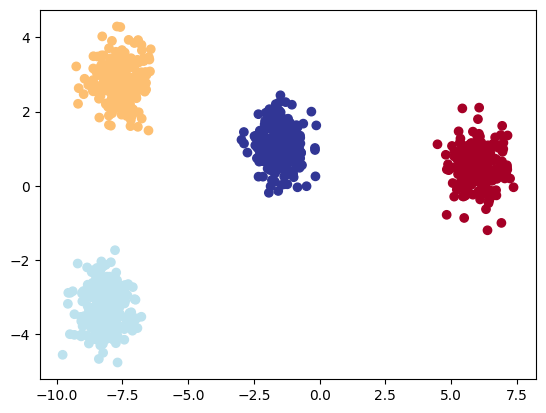

In [68]:
# plot
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)

In [69]:
from torch import nn

In [70]:
class MultiClassification (nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 20):
    super().__init__()
    self.layer = nn.Sequential(nn.Linear(in_features = input_features, out_features = hidden_units),
                               nn.Linear(in_features = hidden_units, out_features = hidden_units),
                               nn.Linear(in_features = hidden_units, out_features = output_features))

  def forward(self, x):
    return self.layer(x)


In [71]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [72]:

model = MultiClassification(input_features = NUM_FEATURES, output_features = NUM_CLASSES, hidden_units = 8).to(device)

In [73]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.1)

In [74]:
import torch

In [75]:
# show values of x train
model(X_blob_train.to(device))[:5]

tensor([[ 1.5535, -0.9306, -0.2371,  0.0289],
        [-1.1683,  0.4126, -0.6553, -0.3955],
        [ 1.7841, -1.0456, -0.1313,  0.1704],
        [ 1.6791, -0.9932, -0.1850,  0.0977],
        [ 1.1350, -0.7337,  0.2734,  0.8263]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [76]:
# show logits values
logits = model(X_blob_test.to(device))
# perform softmax calculations on logits to get prediction probabilities
prediction_probabilities = torch.softmax(logits, dim=1)

In [77]:
prediction_probabilities[:5]

tensor([[0.7324, 0.0422, 0.0980, 0.1273],
        [0.3591, 0.1759, 0.1928, 0.2722],
        [0.3262, 0.1893, 0.1990, 0.2855],
        [0.4334, 0.0628, 0.1822, 0.3215],
        [0.6992, 0.0442, 0.1086, 0.1479]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [78]:
# set manual seed
torch.manual_seed(77)
epochs = 1000
#put everything on device
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

In [79]:
def accuracy_function(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = (correct/len(y_pred)*100)
  return accuracy

In [80]:
for epoch in range(epochs):
  model.train()
  logits = model(X_blob_train)
  predictions = torch.softmax(logits, dim = 1).argmax(dim = 1)
  loss = loss_function(logits, y_blob_train)
  accuracy = accuracy_function(y_true = y_blob_train, y_pred = predictions)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()

  with torch.inference_mode():
    test_logits = model(X_blob_test)
    test_predictions = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
    test_loss = loss_function(test_logits, y_blob_test)
    test_accuracy = accuracy_function(y_true = y_blob_test, y_pred = test_predictions)

  if epoch % 100 == 0:
    print(f'epoch: {epoch}, loss: {loss}, accuracy: {accuracy}, test loss: {test_loss}, test accuracy: {test_accuracy}')



epoch: 0, loss: 2.1043150424957275, accuracy: 10.0, test loss: 1.2422434091567993, test accuracy: 71.0
epoch: 100, loss: 0.05414667725563049, accuracy: 100.0, test loss: 0.05644632875919342, test accuracy: 100.0
epoch: 200, loss: 0.01734377071261406, accuracy: 100.0, test loss: 0.017640970647335052, test accuracy: 100.0
epoch: 300, loss: 0.008815760724246502, accuracy: 100.0, test loss: 0.008844089694321156, test accuracy: 100.0
epoch: 400, loss: 0.005521557759493589, accuracy: 100.0, test loss: 0.005491567309945822, test accuracy: 100.0
epoch: 500, loss: 0.003878803923726082, accuracy: 100.0, test loss: 0.003836730495095253, test accuracy: 100.0
epoch: 600, loss: 0.00292660528793931, accuracy: 100.0, test loss: 0.00288510974496603, test accuracy: 100.0
epoch: 700, loss: 0.0023175592068582773, accuracy: 100.0, test loss: 0.0022802159655839205, test accuracy: 100.0
epoch: 800, loss: 0.0019000866450369358, accuracy: 100.0, test loss: 0.0018676645122468472, test accuracy: 100.0
epoch: 900

In [81]:
# evaluate model
model.eval()
with torch.inference_mode():
  logits = model(X_blob_test)
logits[:5]

tensor([[-1.8181e+01,  1.0010e+01,  2.1785e+01, -3.2520e+00],
        [-2.8787e+00, -7.2140e-01,  2.3296e-01,  4.6148e+00],
        [-1.9575e+00, -1.2472e+00, -1.8913e+00,  5.5139e+00],
        [-2.0338e+01,  1.5131e+01,  3.4120e-03,  8.4126e+00],
        [-1.8927e+01,  1.1116e+01,  1.8826e+01, -1.5719e+00]], device='cuda:0')

In [82]:
# find prediction probabilities with softmax
prediction_probabilities = torch.softmax(logits, dim = 1).argmax(dim = 1)
prediction_probabilities

tensor([2, 3, 3, 1, 2, 0, 0, 1, 0, 0, 0, 3, 0, 2, 2, 2, 0, 3, 0, 0, 0, 1, 2, 3,
        2, 2, 1, 2, 3, 1, 3, 2, 1, 0, 3, 3, 1, 2, 1, 3, 1, 3, 3, 0, 0, 2, 1, 1,
        2, 2, 2, 2, 3, 0, 1, 1, 2, 0, 0, 3, 2, 2, 3, 3, 1, 2, 1, 1, 3, 0, 1, 3,
        1, 3, 0, 1, 3, 2, 2, 3, 3, 2, 1, 3, 2, 0, 3, 0, 1, 1, 2, 0, 3, 2, 1, 3,
        1, 1, 2, 2, 3, 0, 1, 1, 0, 1, 0, 1, 2, 2, 3, 2, 1, 3, 3, 0, 3, 1, 3, 3,
        2, 1, 3, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1, 0, 1, 2, 2, 1, 0, 3, 0, 3, 2,
        3, 3, 3, 2, 0, 0, 1, 2, 1, 1, 0, 2, 3, 1, 1, 2, 1, 0, 0, 1, 0, 3, 1, 2,
        3, 3, 3, 1, 3, 1, 0, 2, 3, 1, 2, 3, 3, 3, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1,
        0, 0, 3, 1, 2, 0, 0, 1], device='cuda:0')

In [83]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn

import os
import zipfile

from pathlib import Path

import requests

import os


def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y."""
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    X_to_pred_on = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()

    model.eval()
    with torch.no_grad():
        y_logits = model(X_to_pred_on)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) if len(torch.unique(y)) > 2 else torch.round(torch.sigmoid(y_logits))

    y_pred = y_pred.reshape(xx.shape).numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


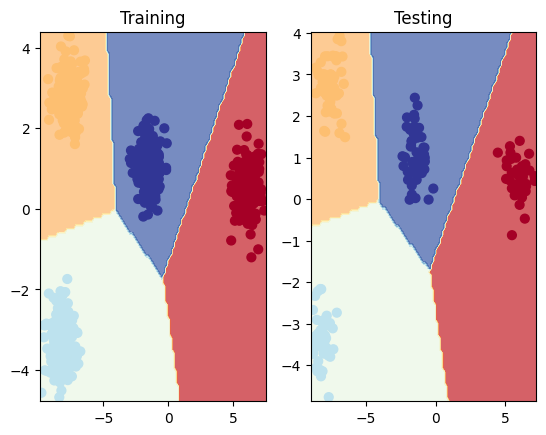

In [84]:
#plt.figure(figsize=(8, 5))  # You can adjust the width and height as needed
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model, X_blob_train, y_blob_train)
#plt.figure(figsize=(8, 5))  # You can adjust the width and height as needed
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model, X_blob_test, y_blob_test)